In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns

from pathlib import Path
from datetime import date, datetime, timedelta
from IPython.display import Markdown, display
from data_process_tourniquet import DataTransform

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

## Импорт данных для разведочного анализа

In [2]:
df = pd.read_csv("train.csv", parse_dates=['timestamp'], index_col='row_id')
test_df = pd.read_csv('test.csv', parse_dates=['timestamp'], index_col='row_id')


# предварительное добавление новых признаков

df['date'] = df['timestamp'].dt.date
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['minutes'] = df.hour * 60 + df.minute
df['seconds'] = df.minutes * 60 + df.second
df['week'] = df['timestamp'].dt.week
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday + 1  # Monday=1, Sunday=7

test_df['date'] = test_df['timestamp'].dt.date
test_df['day'] = test_df['timestamp'].dt.day
test_df['hour'] = test_df['timestamp'].dt.hour
test_df['minute'] = test_df['timestamp'].dt.minute
test_df['week'] = test_df['timestamp'].dt.week
test_df['weekday'] = test_df['timestamp'].dt.weekday + 1  # Monday=1, Sunday=7

df.sort_values(['timestamp', 'gate_id', 'user_id'], inplace=True)
test_df.sort_values(['timestamp', 'gate_id'], inplace=True)

df

,user_id,timestamp,gate_id,date,day,hour,minute,second,minutes,seconds,week,month,weekday
row_id,,,,,,,,,,,,,
0,18,2022-07-29 09:08:54,7,2022-07-29,29,9,8,54,548,32934,30,7,5
1,18,2022-07-29 09:09:54,9,2022-07-29,29,9,9,54,549,32994,30,7,5
2,18,2022-07-29 09:09:54,9,2022-07-29,29,9,9,54,549,32994,30,7,5
3,18,2022-07-29 09:10:06,5,2022-07-29,29,9,10,6,550,33006,30,7,5
4,18,2022-07-29 09:10:08,5,2022-07-29,29,9,10,8,550,33008,30,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,6,2022-12-31 20:38:56,11,2022-12-31,31,20,38,56,1238,74336,52,12,6
37514,6,2022-12-31 20:39:22,6,2022-12-31,31,20,39,22,1239,74362,52,12,6
37515,6,2022-12-31 20:39:23,6,2022-12-31,31,20,39,23,1239,74363,52,12,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37518 entries, 0 to 37517
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    37518 non-null  int64         
 1   timestamp  37518 non-null  datetime64[ns]
 2   gate_id    37518 non-null  int64         
 3   date       37518 non-null  object        
 4   day        37518 non-null  int64         
 5   hour       37518 non-null  int64         
 6   minute     37518 non-null  int64         
 7   second     37518 non-null  int64         
 8   minutes    37518 non-null  int64         
 9   seconds    37518 non-null  int64         
 10  week       37518 non-null  int64         
 11  month      37518 non-null  int64         
 12  weekday    37518 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 3.9+ MB


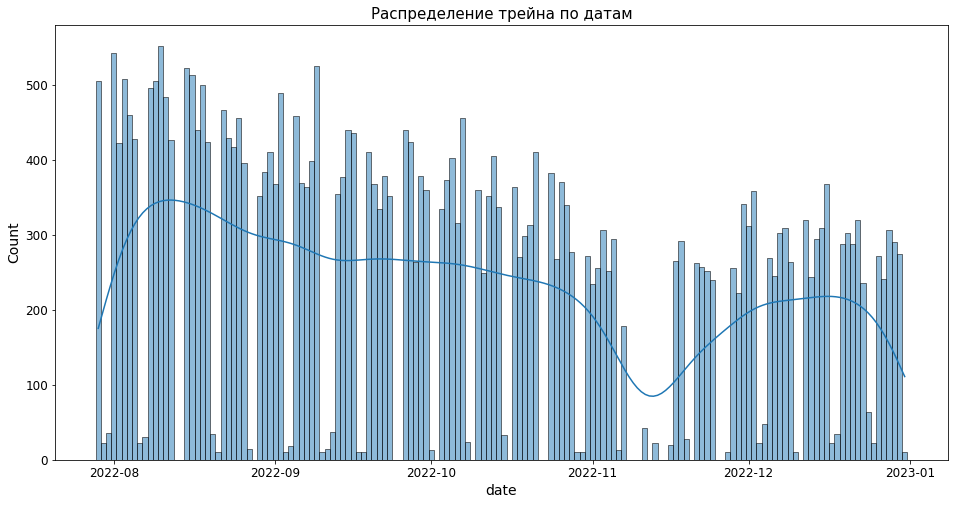

In [4]:
plt.figure(figsize=(16,8))
sns.histplot(data=df['date'], kde=True, bins=df['date'].nunique())
plt.title("Распределение трейна по датам")
plt.show()

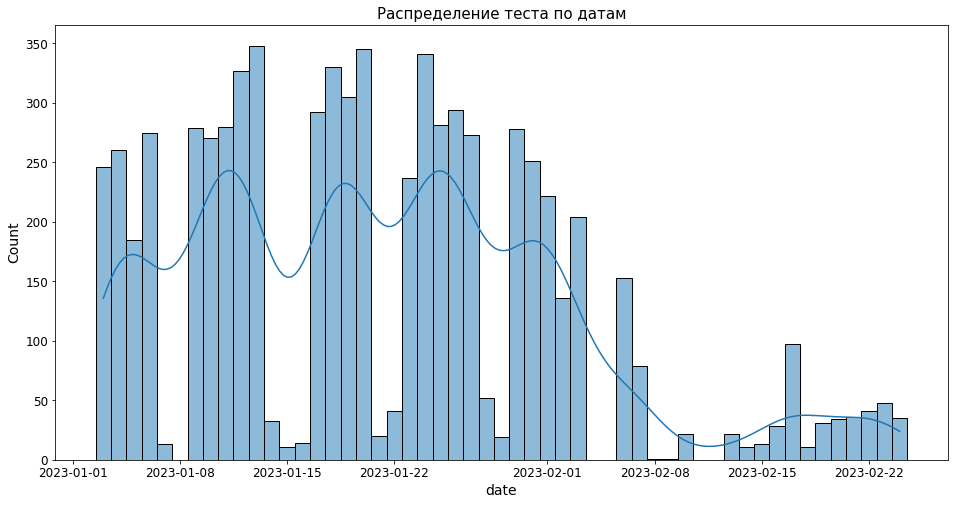

In [5]:
plt.figure(figsize=(16,8))
sns.histplot(data=test_df['date'], kde=True, bins=test_df['date'].nunique())
plt.title("Распределение теста по датам")
plt.show()

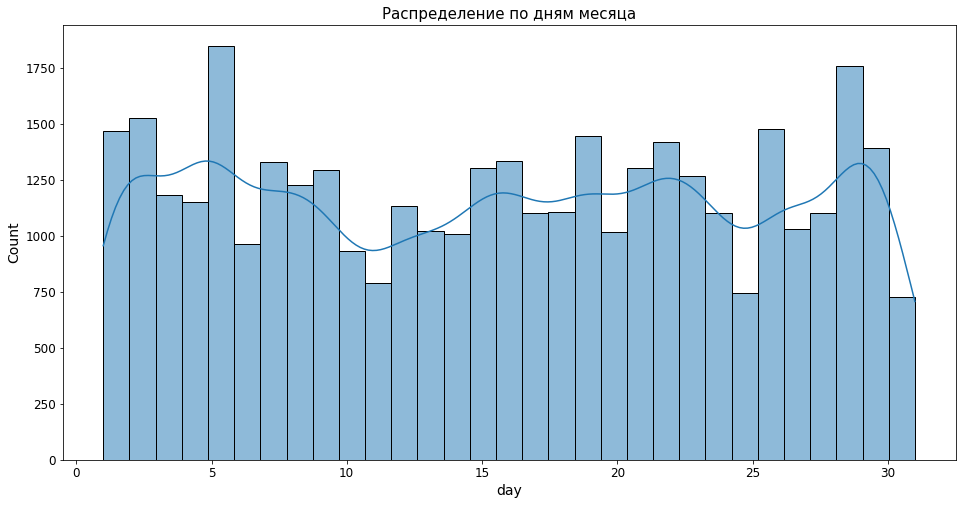

In [6]:
plt.figure(figsize=(16,8))
sns.histplot(data=df['day'], kde=True, bins=31)
plt.title("Распределение по дням месяца")
plt.show()

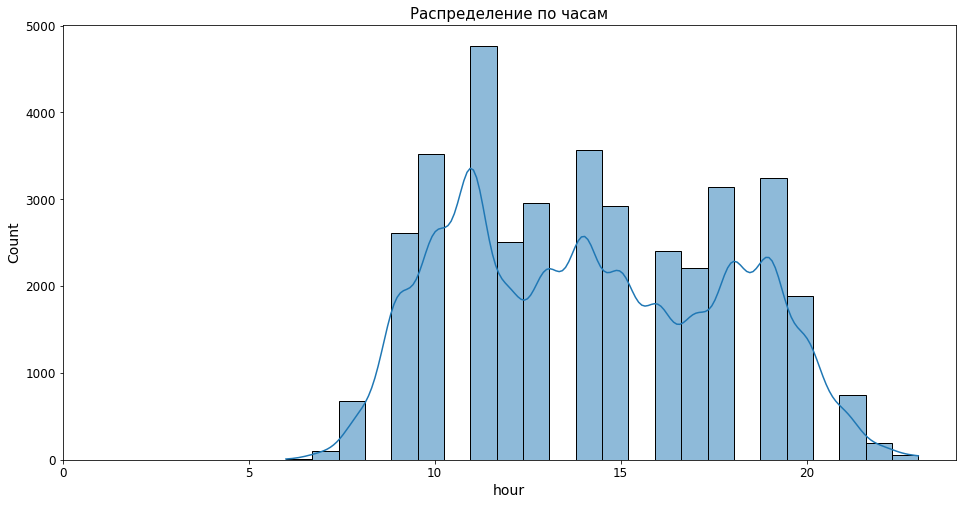

In [7]:
plt.figure(figsize=(16,8))
g = sns.histplot(data=df['hour'], kde=True, bins=24)
g = g.set(xlim=(0,24))
plt.title("Распределение по часам")
plt.show(g)

In [8]:
test_df

,timestamp,gate_id,date,day,hour,minute,week,weekday
row_id,,,,,,,,
37518,2023-01-03 08:21:00,9,2023-01-03,3,8,21,1,2
37519,2023-01-03 08:21:00,9,2023-01-03,3,8,21,1,2
37520,2023-01-03 08:21:18,5,2023-01-03,3,8,21,1,2
37521,2023-01-03 08:21:19,5,2023-01-03,3,8,21,1,2
37522,2023-01-03 08:21:39,10,2023-01-03,3,8,21,1,2
...,...,...,...,...,...,...,...,...
44638,2023-02-24 19:43:36,11,2023-02-24,24,19,43,8,5
44639,2023-02-24 19:44:00,4,2023-02-24,24,19,44,8,5
44640,2023-02-24 19:44:01,4,2023-02-24,24,19,44,8,5


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 37518 to 44642
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  7125 non-null   datetime64[ns]
 1   gate_id    7125 non-null   int64         
 2   date       7125 non-null   object        
 3   day        7125 non-null   int64         
 4   hour       7125 non-null   int64         
 5   minute     7125 non-null   int64         
 6   week       7125 non-null   int64         
 7   weekday    7125 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 473.1+ KB


In [10]:
# количество user_id и их метки

df.user_id.nunique(), df.sort_values('user_id').user_id.unique()

(56,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57], dtype=int64))

In [11]:
# распределение по user_id

df.user_id.value_counts()

37    2262
55    2238
6     2013
12    1953
19    1793
15    1756
18    1578
47    1341
53    1311
1     1299
33    1285
11    1281
49    1275
0     1250
39    1144
32    1076
54    1070
9     1034
50     994
29     990
3      989
48     743
14     696
17     677
27     603
35     601
46     502
57     497
24     416
42     359
26     316
34     284
23     261
25     247
40     242
31     191
56     137
41     124
43     124
20     115
22      96
28      64
45      57
7       49
36      48
2       39
8       29
10      17
38      13
5       10
30      10
21       5
52       5
44       4
51       3
4        2
Name: user_id, dtype: int64

In [12]:
df.week.nunique()

23

In [13]:
# 
grp_user = df.groupby('user_id', as_index=False).agg(
    counts=('timestamp', 'count'),
    date_unique=('date', lambda x: x.nunique()),
    date_min=('date', 'min'),
    date_max=('date', 'max'),
)
grp_user.sort_values('counts')

,user_id,counts,date_unique,date_min,date_max
4,4,2,1,2022-08-09,2022-08-09
49,51,3,2,2022-12-13,2022-12-16
42,44,4,1,2022-12-28,2022-12-28
50,52,5,1,2022-08-10,2022-08-10
19,21,5,2,2022-12-16,2022-12-28
5,5,10,2,2022-10-26,2022-11-30
28,30,10,2,2022-12-16,2022-12-27
36,38,13,2,2022-11-01,2022-11-03
10,10,17,2,2022-11-30,2022-12-07
8,8,29,2,2022-08-09,2022-11-03


In [14]:
df.gate_id.nunique(), df.sort_values('gate_id').gate_id.unique()

(17,
 array([-1,  0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       dtype=int64))

In [15]:
df.groupby('gate_id', as_index=False).user_id.count().rename(columns={'user_id': 'count'}).head(20)

,gate_id,count
0,-1,48
1,0,2
2,1,5
3,3,5351
4,4,8170
5,5,4619
6,6,1800
7,7,3026
8,8,48
9,9,3390


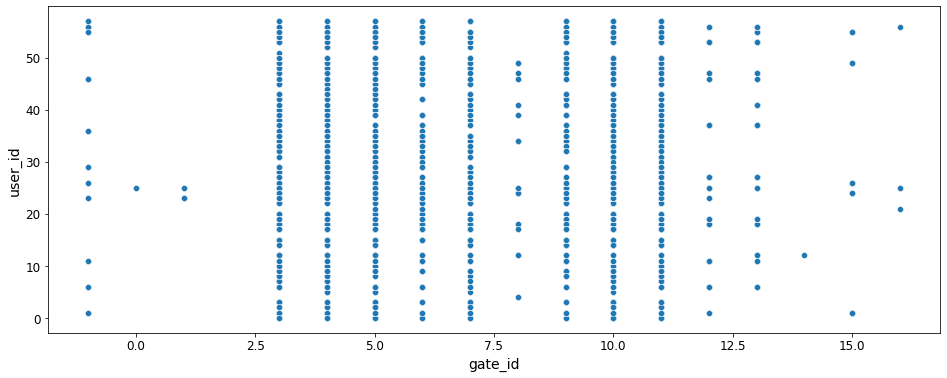

In [16]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x='gate_id', y='user_id')
plt.show()

In [17]:
grp_date = df.groupby(['date', 'user_id', 'gate_id'], as_index=False).timestamp.count().rename(columns={'timestamp': 'count'})
grp_date

,date,user_id,gate_id,count
0,2022-07-29,0,3,4
1,2022-07-29,0,4,2
2,2022-07-29,0,6,2
3,2022-07-29,0,7,1
4,2022-07-29,0,10,1
...,...,...,...,...
14848,2022-12-31,6,6,2
14849,2022-12-31,6,7,1
14850,2022-12-31,6,9,4
14851,2022-12-31,6,10,1


In [18]:
df.timestamp.min(), df.timestamp.max(), df.week.nunique()

(Timestamp('2022-07-29 09:08:54'), Timestamp('2022-12-31 20:39:31'), 23)

In [19]:
grp_week = df.groupby(['week'], as_index=False).agg(
    counts=('timestamp', 'count'),
    user_id_unique=('user_id', lambda x: x.nunique()),
    date_unique=('date', lambda x: x.nunique())
)
grp_week['fraction'] = grp_week['counts'] / grp_week['counts'].sum()
grp_week.to_excel('weeks.xlsx', index=False)
grp_week

,week,counts,user_id_unique,date_unique,fraction
0,30,563,23,3,0.015006
1,31,2410,34,7,0.064236
2,32,2462,37,5,0.065622
3,33,2443,35,7,0.065115
4,34,2178,33,6,0.058052
5,35,2032,34,7,0.054161
6,36,2140,36,7,0.057039
7,37,1664,30,7,0.044352
8,38,1840,33,5,0.049043
9,39,1877,35,6,0.050029


In [20]:
grp_month = df.groupby(['month'], as_index=False).agg(
    counts=('timestamp', 'count'),
    user_id_unique=('user_id', lambda x: x.nunique()),
    date_unique=('date', lambda x: x.nunique())
)
grp_month['fraction'] = grp_month['counts'] / grp_month['counts'].sum()
grp_month.to_excel('month.xlsx', index=False)
grp_month

,month,counts,user_id_unique,date_unique,fraction
0,7,563,23,3,0.015006
1,8,10639,42,28,0.283571
2,9,8394,39,28,0.223733
3,10,7238,40,26,0.192921
4,11,4042,42,21,0.107735
5,12,6642,42,30,0.177035


In [21]:
test_df.timestamp.min(), test_df.timestamp.max()

(Timestamp('2023-01-03 08:21:00'), Timestamp('2023-02-24 19:44:09'))

In [22]:
test_df.groupby(['week'], as_index=False).agg(
    counts=('timestamp', 'count'),
)

,week,counts
0,1,979
1,2,1548
2,3,1347
3,4,1497
4,5,1091
5,6,256
6,7,213
7,8,194


In [23]:
grp_dat = df.groupby(['date'], as_index=False).timestamp.count().rename(columns={'timestamp': 'count'})
grp_dat

,date,count
0,2022-07-29,505
1,2022-07-30,22
2,2022-07-31,36
3,2022-08-01,542
4,2022-08-02,422
...,...,...
131,2022-12-27,241
132,2022-12-28,306
133,2022-12-29,290
134,2022-12-30,274


In [24]:
df.groupby(['user_id', 'day'], as_index=False).date.count().rename(columns={'date': 'count'})

,user_id,day,count
0,0,1,52
1,0,2,42
2,0,3,43
3,0,4,39
4,0,5,72
...,...,...,...
1118,57,27,7
1119,57,28,6
1120,57,29,21
1121,57,30,27


In [25]:
df.date.nunique() # уникальных дат

136

In [26]:
# посмотрим сколько дней приходили юзеры

df_date = df[['user_id', 'date']].drop_duplicates()
grp = df_date.groupby(['user_id'], as_index=False).date.count().rename(columns={'date': 'count'})
grp.sort_values(['count', 'user_id'])

,user_id,count
4,4,1
42,44,1
50,52,1
5,5,2
8,8,2
10,10,2
19,21,2
28,30,2
36,38,2
49,51,2


In [27]:
grp.sort_values('user_id')

,user_id,count
0,0,97
1,1,98
2,2,3
3,3,93
4,4,1
5,5,2
6,6,95
7,7,8
8,8,2
9,9,60


### Перечитаем данные после обработки классом

In [28]:
file_dir = Path(r'D:\python-txt\tourniquet')
file_train = file_dir.joinpath('train.csv')
file_test = file_dir.joinpath('test.csv')
train_df = pd.read_csv(file_train, parse_dates=['timestamp'], index_col='row_id')
test_df = pd.read_csv(file_test, parse_dates=['timestamp'], index_col='row_id')
test_df.insert(0, 'user_id', -1)

all_df = pd.concat([train_df, test_df])

data_cls = DataTransform(category_columns=[])
data_cls.preprocess_path_file = file_dir.joinpath('preprocess_df.pkl')
all_df = data_cls.initial_preparation(all_df)
all_df.columns

Index(['user_id', 'timestamp', 'gate_id', 'date', 'time', 'day', 'week',
       'month', 'hour', 'min', 'sec', 'minutes', 'seconds', '1day', '2day',
       'last_day-1', 'last_day', 'weekday', 'dayofweek', 'is_weekend', 'DofY1',
       'DofY2', 'beep_count', 'beep_gate'],
      dtype='object')

In [29]:
test_df.groupby('gate_id', as_index=False).user_id.count().rename(columns={'user_id': 'count'}).head(20)

,gate_id,count
0,-1,2
1,1,2
2,2,4
3,3,909
4,4,1459
5,5,860
6,6,294
7,7,540
8,8,18
9,9,780


In [30]:
# турникеты, которых нет в тесте
set(train_df.gate_id.unique()) - set(test_df.gate_id.unique())

{0, 16}

In [31]:
# кто и когда ходил через эти турникеты - попробовать из убрать из трейна

train_df[train_df.gate_id.isin([0,16])]

,user_id,timestamp,gate_id
row_id,,,
12652,25,2022-09-06 11:16:28,0
12653,25,2022-09-06 11:16:36,0
21309,25,2022-10-07 16:44:37,16
21310,25,2022-10-07 16:44:38,16
36798,56,2022-12-28 14:49:51,16
36799,21,2022-12-28 14:49:54,16


In [32]:
# посмотрим на редко приходящих юзеров

train_df[train_df.user_id.isin([4, 44, 51])]

,user_id,timestamp,gate_id
row_id,,,
3504,4,2022-08-09 10:09:08,8
3505,4,2022-08-09 10:09:08,8
33465,51,2022-12-13 13:30:11,3
34330,51,2022-12-16 13:56:08,9
34331,51,2022-12-16 13:56:08,9
36779,44,2022-12-28 14:22:19,5
36780,44,2022-12-28 14:22:21,5
36783,44,2022-12-28 14:22:37,4
36784,44,2022-12-28 14:22:39,4


Возможно нужно убрать user_id 4 и 51, т.к. они случайно зашли

In [33]:
# посмотрим на все записи, которые будем считать выбросами

outlet_user_gate = train_df.user_id.isin([4,51]) | train_df.gate_id.isin([0,16]) 

train_df[outlet_user_gate]

,user_id,timestamp,gate_id
row_id,,,
3504,4,2022-08-09 10:09:08,8
3505,4,2022-08-09 10:09:08,8
12652,25,2022-09-06 11:16:28,0
12653,25,2022-09-06 11:16:36,0
21309,25,2022-10-07 16:44:37,16
21310,25,2022-10-07 16:44:38,16
33465,51,2022-12-13 13:30:11,3
34330,51,2022-12-16 13:56:08,9
34331,51,2022-12-16 13:56:08,9


#### Посмотрим на распределение проходов по рабочим/выходным дням

In [34]:
flt_cols = ['date', 'weekday', 'beep_count', 'is_weekend']
tmp = all_df[flt_cols].drop_duplicates()
tmp["weekend"] = tmp["weekday"].map(lambda x: 1 if x in (5, 6) else 0)
tmp['cmp_weekends'] = tmp["weekend"] == tmp["is_weekend"]

grp_date = all_df.groupby(['date'], as_index=False).agg(
        date_cnt=('timestamp', 'count')
    )

In [35]:
tmp[tmp["weekend"] == 1].describe()

,weekday,beep_count,is_weekend,weekend
count,40.000000,40.000000,40.0,40.0
mean,5.425000,29.400000,1.0,1.0
std,0.500641,44.799153,0.0,0.0
min,5.000000,11.000000,1.0,1.0
25%,5.000000,11.000000,1.0,1.0
50%,5.000000,21.000000,1.0,1.0
75%,6.000000,31.500000,1.0,1.0
max,6.000000,294.000000,1.0,1.0


In [36]:
beep_counts = tmp[tmp["weekend"] == 1].beep_count
beep_counts.quantile(0.75) + beep_counts.std()*1.5, beep_counts.quantile(0.975)

(98.69872938359201, 69.74999999999967)

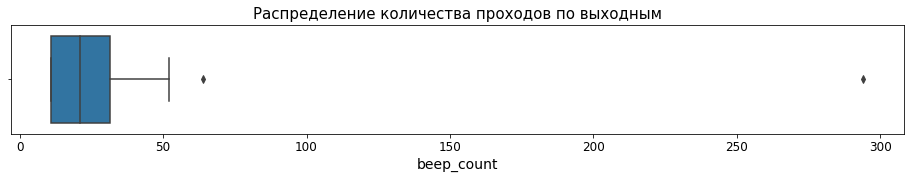

In [37]:
fig, ax = plt.subplots(figsize=(16, 2))
sns.boxplot(x='beep_count', data=tmp[tmp["weekend"] == 1], ax=ax)
plt.title('Распределение количества проходов по выходным')
plt.show()

##### Есть выбросы, нужно отметить эти выходные дни как рабочие

In [38]:
tmp[tmp["weekend"] == 0].describe()

,weekday,beep_count,is_weekend,weekend
count,144.000000,144.000000,144.0,144.0
mean,2.034722,301.854167,0.0,0.0
std,1.421184,132.062232,0.0,0.0
min,0.000000,1.000000,0.0,0.0
25%,1.000000,251.750000,0.0,0.0
50%,2.000000,307.500000,0.0,0.0
75%,3.000000,382.500000,0.0,0.0
max,4.000000,552.000000,0.0,0.0


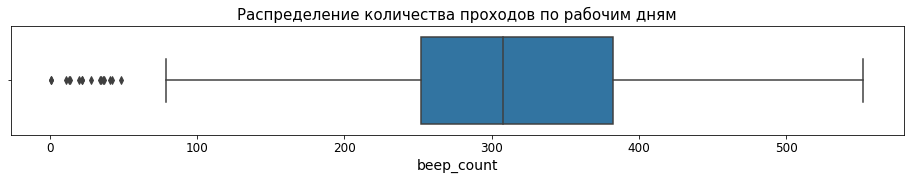

In [39]:
fig, ax = plt.subplots(figsize=(16, 2))
sns.boxplot(x='beep_count', data=tmp[tmp["weekend"] == 0], ax=ax)
plt.title('Распределение количества проходов по рабочим дням')
plt.show()

#### Есть выбросы в рабочих днях, нужно отмечать такие дни как выходные

In [40]:
beep_counts = tmp[tmp["weekend"] == 1].beep_count
beep_quantile = beep_counts.quantile(0.975)
beep_quantile_std = beep_counts.quantile(0.75) + beep_counts.std() * 1.5
print(beep_quantile, beep_quantile_std)

69.74999999999967 98.69872938359201


#### Попробовать обе стратегии по разграничению дней: 
- порог 5%, т.е. 2.5% от максимального значения по выходным (или минимального значения по рабочим дням) = 69.7
- взять третий квантиль + полтора стандартных отклонения как на графике с боксплотами = 98.7

### Исследование паттернов в турникетах

In [41]:
train_df.head()

,user_id,timestamp,gate_id
row_id,,,
0,18,2022-07-29 09:08:54,7
1,18,2022-07-29 09:09:54,9
2,18,2022-07-29 09:09:54,9
3,18,2022-07-29 09:10:06,5
4,18,2022-07-29 09:10:08,5


In [42]:
from tqdm import tqdm


tmp = train_df
tmp["date"] = tmp["timestamp"].dt.date
current_user_id = current_date = prev_time = None
current_gate_times, current_gates = [], []
res_gate_times, result_gates = [], []

# Получение последовательности турникетов одного user_id в день
# смотрим только последовательности 3 и более подряд турникетов

for index, row in tqdm(tmp.iterrows()):
    if current_user_id != row["user_id"] or current_date != row["date"]:
        if len(current_gate_times) >= 3:
            res_gate_times.append((current_user_id, current_gate_times))
            result_gates.append((current_user_id, current_gates))
        current_gate_times, current_gates = [], []
        current_user_id = row["user_id"]
        current_date = row["date"]
        prev_time = row["timestamp"]
    delta = int((row["timestamp"] - prev_time).total_seconds()) if prev_time else 0
    prev_time = row["timestamp"]
    current_gate_times.append((row["gate_id"], delta))
    current_gates.append(row["gate_id"])

if len(current_gate_times) >= 3:
    res_gate_times.append((current_user_id, current_gate_times))
    result_gates.append((current_user_id, current_gates))

37518it [00:06, 5418.63it/s]


In [43]:
result_gates[:5]

[(18, [7, 9, 9, 5, 5, 10, 11, 4, 4]),
 (18, [9, 9, 5, 5, 10]),
 (1, [9, 9, 5, 5, 10]),
 (3, [7, 9, 9, 5, 5, 10]),
 (6, [9, 9, 5, 5, 10])]

In [44]:
print(*res_gate_times[:5], sep='\n')

(18, [(7, 0), (9, 60), (9, 0), (5, 12), (5, 2), (10, 26), (11, 1333), (4, 25), (4, 1)])
(18, [(9, 0), (9, 0), (5, 18), (5, 1), (10, 22)])
(1, [(9, 0), (9, 0), (5, 14), (5, 1), (10, 27)])
(3, [(7, 0), (9, 129), (9, 0), (5, 12), (5, 2), (10, 26)])
(6, [(9, 0), (9, 0), (5, 10), (5, 2), (10, 20)])


In [45]:
# # возьмем последовательность меньше 7 для ручного отбора, чтобы добавить в self.gates_mask
# res_gate = [*map(lambda x: tuple(x[1][:6]), result_gates)]
# получение из последовательность турникетов шаблонов длиной от 3х до 6-ти турникетов

use_thresholds = False  # использовать ограничения по кол-ву последовательных турникетов

res_gate = []
for user_gates in result_gates:
    gates = user_gates[1]
    if use_thresholds:
        start_range = 3 if len(gates) < 5 else 4
    else:
        start_range = 3
    for len_mask in range(start_range, 7):
        res_gate.extend([*zip(*[gates[i:] for i in range(len_mask)])])
print('Количество комбинаций в шаблонах:', len(res_gate))

Количество комбинаций в шаблонах: 26448


In [46]:
res_gate[:5]

[(7, 9, 9), (9, 9, 5), (9, 5, 5), (5, 5, 10), (5, 10, 11)]

#### Дальнейшая обработка выделена в 0_make_patterns.py

#### Поиск паттернов в трейне и тесте на основе полученных шаблонов выполняется в 1_data_process.py время работы примерно полтора часа, в зависимости от условий отбора шаблонов. Было сформировано 5 датасетов (шаблоны длиной от 3 до 6 турникетов):
- по шаблонам с начала последовательности (88 шаблонов) файл без суффикса
- по шаблонам предыдущего пункта (88 шаблонов) и занулением дельты времени прохода < 10 секунд (суффикс "_min_0")
- по шаблонам по всей непрерывной последовательности проходов (1-2 прохода игнорировалось) суффикс "_fp"
- по шаблонам по всей непрерывной последовательности проходов (< 4 проходов игнорировалось) суффикс "_fp2"
- по шаблонам по всей последовательности проходов с таким алгоритмом отбора шаблонов (137 шаблонов) "_MV2": 
    - количество проходов по шаблону 1 или 2 - игнорируем,
    - количество проходов по шаблону 3 и 4 берем только шаблоны длиной 3 и 4,
    - количество проходов по шаблону = 5 берем длины 3, 4 и 5,
    - количество проходов по шаблону = 6 и более берем длины 4, 5 и 6
    
Все 5 предобработанных датасетов находятся здесь: https://kaggle.com/datasets/96f47ada713bb5a39094c951cfa4f736748aee88d446a5e0e29f60eec1533caf    
    
#### По результатам обучения разных моделей было выявлено, что шаблоны, с количеством проходов меньше 5 нужно исключать из датасета.

#### Вся обработка данных ведется в классе DataTransform (data_process_tourniquet.py): в нем коментарии в каждом методе, что в нем делается.

#### Было обучено 4 разных классификатора:
- Логистическая регрессия (файл tourniquet_LR.py). Лучший результат получился на датасете с суффиксом "_MV2" и шаблонами 6 и более проходов, с переразметкой рабочий/выходной день с порогом 98.7 проходов в день. Результат Accuracy = 0,2184166199 - 15 место в лидерборде на паблике https://ods.ai/competitions/gates/leaderboard
- CatBoostClassifier (файл tourniquet-cats.ipynb) обучался на каггле на GPU, т.к. на ПК обучается больше часа. Лучший результат получился на датасете с суффиксом "_min_0" и шаблонами 6 и более проходов, с переразметкой рабочий/выходной день с порогом 98.7 проходов в день. Результат Accuracy = 0,2391914655 - 10 место в лидерборде на паблике
- LGBMClassifier (файл tourniquet_lightgbm_V2.py). Лучший результат получился на датасете с суффиксом "_min_0" и шаблонами 5 и более проходов, с переразметкой рабочий/выходной день с порогом 98.7 проходов в день. Результат Accuracy = 0,2594048287 - 8 место в лидерборде на паблике
- XGBClassifier (файл tourniquet_xgboost.py). Лучший результат получился на датасете с суффиксом "_min_0" всеми шаблонами, с переразметкой рабочий/выходной день с порогом 98.7 проходов в день. Результат Accuracy = 0,2302077485 - 13 место в лидерборде на паблике.

Для каждого классификатора был подобран размер валидационной выборки test_sizes (из диапазона np.linspace(0.1, 0.4, 7) и более детальный np.linspace(0.15, 0.25, 11)) и random_state (из диапазона range(0, 100)) для train_test_split.
Оптимальным оказался random_state=17 (для CatBoostClassifier random_state=86) и test_sizes=0.2 (0.19 давал аналогичный результат). При меньшем объеме валидационной выборки модель пререобучалась, т.к. метрики были выше на трейне и валидации, но при загрузке сабмита на сайт Accuracy уменьшался. При большем объеме, наоборот модель недообучалась, метрики уменьшались.

Для всех классификаторов подбирались несколько важных гиперпараметров с помощью optuna, что конкретно подбиралось указано в фукции objective в файле по каждому классификатору.

На основе лучших результатов всех классификаторов был создан стекинг классификатор (файл stacking_lightgbm.py), но не с помощью StackingClassifier от sklearn, а на результатах предсказаний: во время опытов формировались файлы с вероятносными предсказаниями классов для трейна и теста. Было жаль было тратить время на повторное обучение 4-х моделей и сбор моделей на одной платформе (CatBoostClassifier обучался на каггле, остальные на ПК). Свой стекинг классификатор был собран на основе LGBMClassifier, результат получился Accuracy = 0,2274003369 - 13 место в лидерборде.

Потом был опробован войтинг классификатор (файл stacking_voited.py), но не с помощью VotingClassifier от sklearn, а на основе готовых предсказаний:
- Предсказание метки класса на основе argmax сумм предсказанных вероятностей - это аналог VotingClassifier(estimators, voting='soft') --> Accuracy = 0,1184727681 - очень плохой результат :(
- Предсказание метки классов при голосовании по правилу большинства - VotingClassifier(estimators, voting='hard') --> Accuracy = 0,2658618754 - 6 место в лидерборде на паблике - отличный результат на основе того, что было
- Пробовал предыдущий метод на большем количестве предсказаний от разных классификаторов на разных данных с разными параметрами обучения - результат оказался хуже. Такой же Accuracy получился на результатах предсказаний трех классийикаторах, без XGBClassifier.